In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv("../msd_pre.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 11 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   title         1000000 non-null  object 
 1   year          1000000 non-null  int64  
 2   popularity    581965 non-null   float64
 3   duration      1000000 non-null  float64
 4   danceability  1000000 non-null  float64
 5   energy        1000000 non-null  float64
 6   key           1000000 non-null  int64  
 7   loudness      1000000 non-null  float64
 8   mode          1000000 non-null  int64  
 9   tempo         1000000 non-null  float64
 10  signature     1000000 non-null  int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 83.9+ MB


In [48]:
df.drop("title", axis=1, inplace=True)
df.drop("energy", axis=1, inplace=True)
df.drop("danceability", axis=1, inplace=True)

df.describe()

,year,popularity,duration,key,loudness,mode,tempo,signature
count,1000000.000000,581965.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,1030.325652,0.447789,249.500755,5.321964,-10.124039,0.666408,123.889369,3.593947
std,998.745002,0.373834,126.229636,3.601595,5.197245,0.471496,35.055810,1.221925
min,0.000000,0.000000,0.313020,0.000000,-58.178000,0.000000,0.000000,0.000000
25%,0.000000,0.072594,180.740770,2.000000,-12.672000,0.000000,97.995000,3.000000
50%,1969.000000,0.381671,228.858320,5.000000,-8.963000,1.000000,122.086500,4.000000
75%,2002.000000,0.908936,289.932610,9.000000,-6.386000,1.000000,144.089000,4.000000
max,2011.000000,1.000000,3034.905670,11.000000,4.318000,1.000000,302.300000,7.000000


In [49]:
df = df[df["tempo"] != 0]
df = df[df["year"] != 0]
df = df[df["popularity"] != 0]
df = df[df["duration"] != 0]

# df['duration'] = df['duration'] * 1000

df = df.dropna()

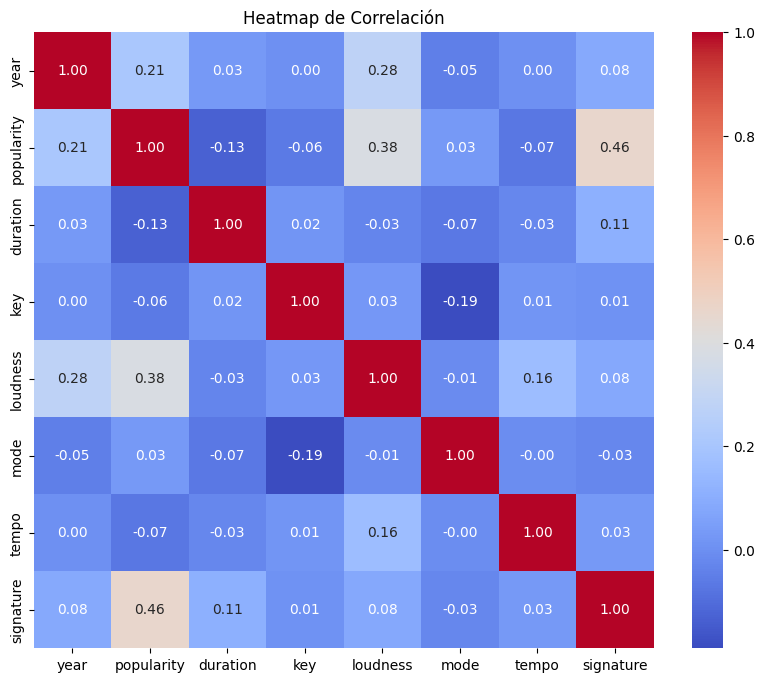

In [50]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap de Correlación")
plt.show()

## Año
### Histograma

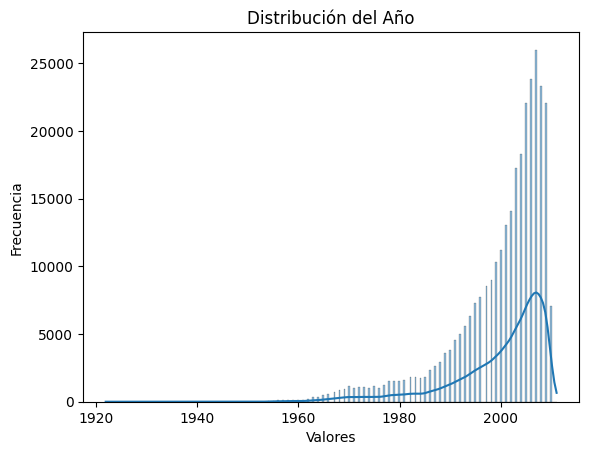

In [51]:
sns.histplot(df['year'], kde=True)
plt.title('Distribución del Año')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

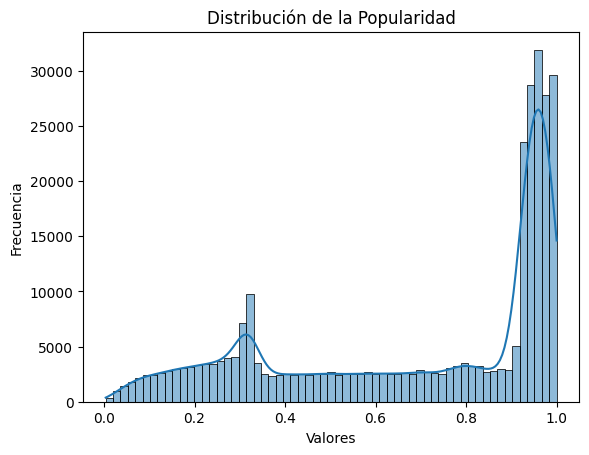

In [52]:
sns.histplot(df['popularity'], kde=True)
plt.title('Distribución de la Popularidad')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

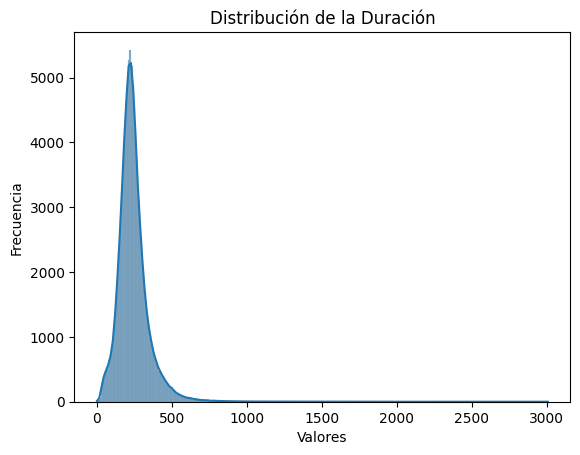

In [53]:
sns.histplot(df['duration'], kde=True)
plt.title('Distribución de la Duración')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

In [54]:
count = (df["duration"] > 1000).sum()
count

480

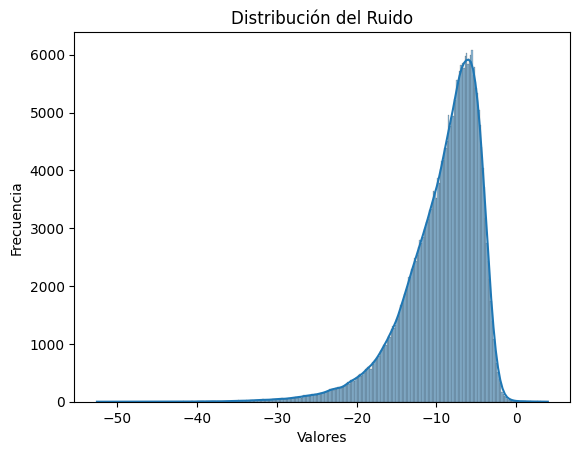

In [55]:
sns.histplot(df['loudness'], kde=True)
plt.title('Distribución del Ruido')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

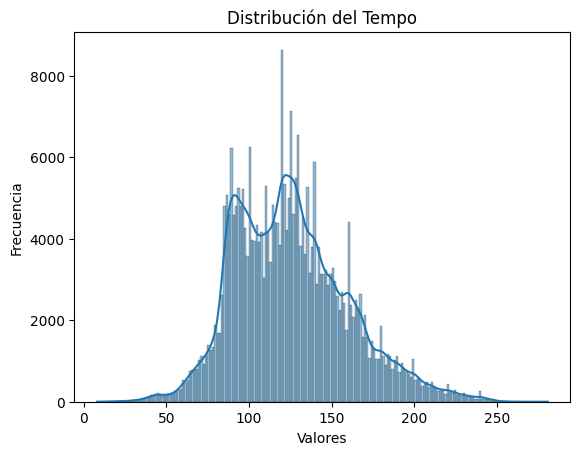

In [56]:
sns.histplot(df['tempo'], kde=True)
plt.title('Distribución del Tempo')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

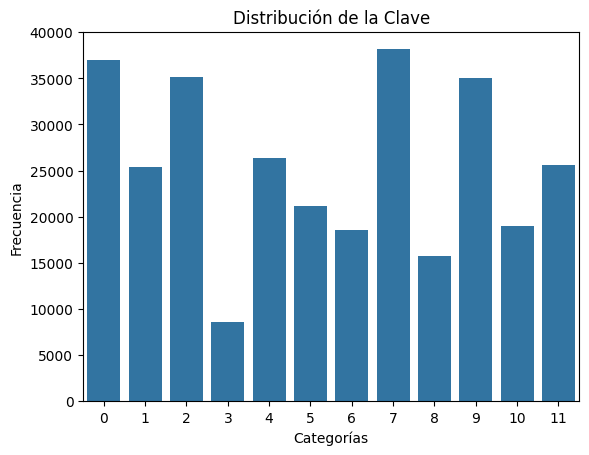

In [57]:
sns.countplot(x=df['key'])
plt.title('Distribución de la Clave')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.show()

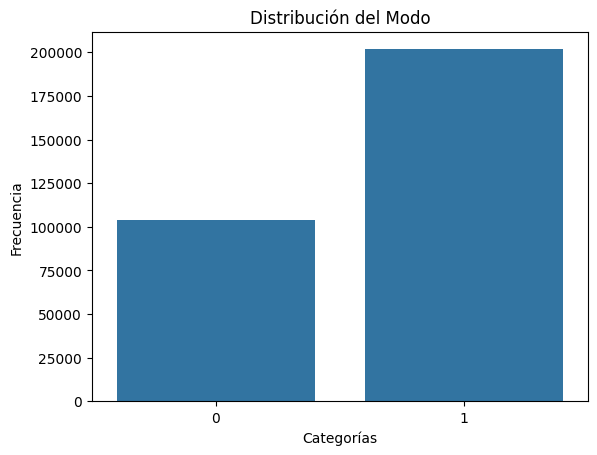

In [58]:
sns.countplot(x=df['mode'])
plt.title('Distribución del Modo')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.show()

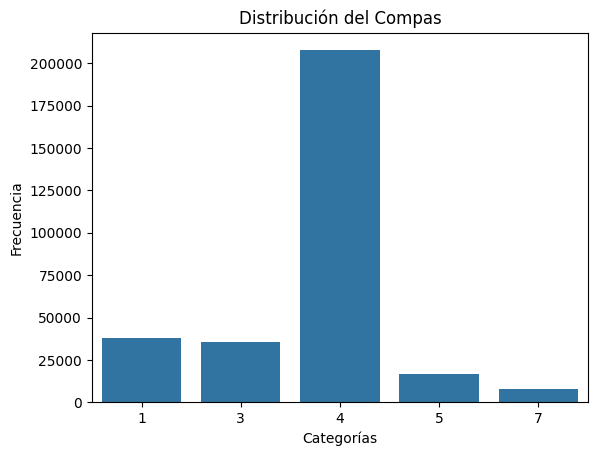

In [59]:
sns.countplot(x=df['signature'])
plt.title('Distribución del Compas')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.show()